# Exploración de perfiles de datos generales, de personalidad y de niveles de estrés, depresión y ansiedad
### Juan Pablo Maldonado Castro - 420138620
### Minería de datos 
### UNAM - ENES Morelia
### 2 de febrero de 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

import mlxtend as mlx
import mlxtend.preprocessing as mlp
import mlxtend.frequent_patterns as FP
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics import normalized_mutual_info_score

In [2]:
df = pd.read_csv("Dataset/data.csv", sep='\t')

# Eliminando datos que no tienen información sobre algunas de las características generales del encuestado
df = df[df['age'] <= 120]
df = df[df['gender'] != 0]
df = df[df['familysize'] != 0]
df = df[df['familysize'] <= 17]
df = df[df['married'] != 0]
df = df[df['religion'] != 0]
df = df[df['hand'] != 0]
df = df[df['orientation'] != 0]
df = df[df['education'] != 0]
df = df[df['urban'] != 0]
df['race'] = (df['race']//10)


In [3]:
df.dtypes

Q1A            int64
Q1I            int64
Q1E            int64
Q2A            int64
Q2I            int64
               ...  
race           int64
voted          int64
married        int64
familysize     int64
major         object
Length: 172, dtype: object

In [4]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,1,2,1,2,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,6,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,7,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,1,2,1,4,Psychology
5,1,18,6116,1,28,3193,2,2,12542,1,...,2,1,1,4,1,7,2,1,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,3,32,28897,4,4,3025,2,30,3248,2,...,2,1,1,1,1,7,2,1,3,NaN
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,6,2,1,2,NaN
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,3,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,6,1,1,2,History



### Datos de las respuestas a preguntas de la encuesta

In [5]:
dfAnswers = df.filter(regex=("Q\d*A"))
dfAnswers

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
5,1,1,2,1,3,1,1,3,3,2,...,4,1,3,2,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,3,4,2,2,2,4,4,2,1,3,...,3,4,2,1,2,1,4,4,2,1
39770,2,1,3,2,3,2,1,3,1,4,...,2,4,1,2,4,4,2,3,1,3
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,1,1,1,2,1,1,1
39773,3,1,2,2,3,3,3,4,3,1,...,4,2,3,2,1,2,3,2,4,3


### Datos en cuanto a preguntas relacionadas a la personalidad

In [6]:
dfPersonality = df.filter(regex=("TIPI\d"))
dfPersonality

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,1,5,7,7,7,7,7,5,1,1
2,2,5,2,2,5,6,5,5,3,2
3,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3
5,2,1,6,1,7,7,7,2,6,7
...,...,...,...,...,...,...,...,...,...,...
39769,6,5,4,5,6,3,5,2,5,7
39770,2,2,3,5,6,5,5,3,3,6
39772,6,6,7,5,6,3,6,1,5,4
39773,1,6,5,7,3,5,3,5,3,4


### Datos generales de la persona

In [7]:
dfGeneral = df[['education',
                'urban',
                'gender',
                'engnat',
                'age',
                'hand',
                'religion',
                'orientation',
                'race',
                'voted',
                'married',
                'familysize',]]
                #'major']] #muy problemática por valores no únicos
dfGeneral

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
0,2,3,2,2,16,1,12,1,1,2,1,2
2,2,3,2,2,17,1,4,3,6,1,1,3
3,1,3,2,1,13,2,4,5,7,2,1,5
4,3,2,2,2,19,3,10,1,1,2,1,4
5,2,3,2,2,20,1,4,1,7,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39769,1,2,2,1,16,1,1,1,7,2,1,3
39770,2,2,1,1,16,1,2,4,6,2,1,2
39772,3,2,2,1,48,1,7,1,3,1,2,3
39773,3,2,2,1,20,1,6,1,6,1,1,2


### Calculando escala de estrés, ansiedad y depresión (DASS)

Referencia para calcular nivel: https://www.psytoolkit.org/survey-library/depression-anxiety-stress-dass.html

In [8]:
# Dictionary where the each answer column has a category (depression, anxiety, stress)
questionCategory = {"Depression": ["Q" + str(i) + "A" for i in [3,5,10,13,16,17,21,24,26,31,34,37,38,42]],
                   "Anxiety": ["Q" + str(i) + "A" for i in [2,4,7,9,15,19,20,23,25,28,30,36,40,41]],
                   "Stress": ["Q" + str(i) +"A" for i in [1,6,8,11,12,14,18,22,27,29,32,33,35,39]]}

# Calculating total DASS Score for each person
for category in questionCategory:
    col_list = questionCategory[category]
    df[category + "Points"] = dfAnswers[col_list].sum(axis = 1) - len(questionCategory[category])
    
#Classifying according to the DASS score of each one
conditions = [
        (df["Depression" + "Points"] <= 9),
        (df["Depression" + "Points"] >= 10) &  (df["Depression" + "Points"] <= 13),
        (df["Depression" + "Points"] >= 14) & (df["Depression" + "Points"] <= 20),
        (df["Depression" + "Points"] >= 21) & (df["Depression" + "Points"] <= 27),
        (df["Depression" + "Points"] > 27)]

values = [0,1,2,3,4]

df["Depression" + "Cat"] = np.select(conditions, values)

conditions = [
        (df["Anxiety" + "Points"] <= 7),
        (df["Anxiety" + "Points"] > 7) &  (df["Anxiety" + "Points"] <= 9),
        (df["Anxiety" + "Points"] > 9) & (df["Anxiety" + "Points"] <= 14),
        (df["Anxiety" + "Points"] > 14) & (df["Anxiety" + "Points"] <= 19),
        (df["Anxiety" + "Points"] > 19)]

values = [0,1,2,3,4]

df["Anxiety" + "Cat"] = np.select(conditions, values)

conditions = [
        (df["Stress" + "Points"] <= 14),
        (df["Stress" + "Points"] > 14) &  (df["Stress" + "Points"] <= 18),
        (df["Stress" + "Points"] > 18) & (df["Stress" + "Points"] <= 25),
        (df["Stress" + "Points"] > 25) & (df["Stress" + "Points"] <= 33),
        (df["Stress" + "Points"] > 33)]

values = [0,1,2,3,4]

df["Stress" + "Cat"] = np.select(conditions, values)

In [9]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,voted,married,familysize,major,DepressionPoints,AnxietyPoints,StressPoints,DepressionCat,AnxietyCat,StressCat
0,4,28,3890,4,25,2122,2,16,1944,4,...,2,1,2,NaN,27,34,40,3,4,4
2,3,7,5784,1,33,4373,4,41,3242,1,...,1,1,3,NaN,39,12,17,4,2,1
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,5,biology,16,17,16,2,3,1
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,1,4,Psychology,32,40,29,4,4,3
5,1,18,6116,1,28,3193,2,2,12542,1,...,2,1,4,NaN,13,6,12,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,3,32,28897,4,4,3025,2,30,3248,2,...,2,1,3,NaN,15,21,30,2,4,3
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,2,NaN,36,12,15,4,2,1
39772,2,1,25147,1,4,4555,2,14,3388,1,...,1,2,3,Computer Science,4,1,5,0,0,0
39773,3,36,4286,1,34,2736,2,10,5968,2,...,1,1,2,History,16,13,33,2,2,3


### Datos de la escala de Depresión, Estrés y Ansiedad

In [10]:
dfDASS = pd.DataFrame()

for category in questionCategory:
    dfDASS[category + "Cat"] = df[category + "Cat"]

In [11]:
dfDASS

,DepressionCat,AnxietyCat,StressCat
0,3,4,4
2,4,2,1
3,2,3,1
4,4,4,3
5,1,0,0
...,...,...,...
39769,2,4,3
39770,4,2,1
39772,0,0,0
39773,2,2,3


### Cálculo del tipo de personalidad
Referencia código https://www.kaggle.com/solvalou/dass-eda/notebook

Referencia del test de tipo de personalidad http://gosling.psy.utexas.edu/wp-content/uploads/2014/09/JRP-03-tipi.pdf

In [12]:
# Add personality types to data
personality_types = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness']

# Invert some entries
tipi = dfPersonality.copy()
tipi_inv = tipi.filter(regex='TIPI(2|4|6|8|10)').apply(lambda d: 7 - d)
tipi[tipi.columns.intersection(tipi_inv.columns)] = tipi_inv

# Calculate scores
for idx, pt in enumerate( personality_types ):
    df[pt] = tipi[['TIPI{}'.format(idx + 1), 'TIPI{}'.format(6 + idx)]].mean(axis=1)

personalities = df[personality_types]
personalities

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
0,0.5,4.5,4.5,0.5,6.5
2,1.5,3.5,2.0,4.0,5.0
3,2.0,6.0,6.5,4.5,6.0
4,2.0,3.5,2.0,2.0,4.5
5,1.0,6.5,5.5,6.0,3.5
...,...,...,...,...,...
39769,5.0,3.5,4.5,3.5,3.0
39770,2.0,5.0,3.5,2.5,3.5
39772,5.0,3.5,6.5,3.5,4.5
39773,1.5,2.0,3.5,1.5,3.0


## Funciones generales

In [13]:
def pca2(data, pc_count = None):
    return PCA(n_components = 2).fit_transform(data)

#Dendrograma
def getDendrogram(dataF):
    cj = linkage(dataF, 'complete')
    
    dendrogram(cj, p = 5, truncate_mode = 'level')#, p = 5, truncate_mode='level')
    plt.ylabel("Distancia",fontsize = 16)
    plt.xlabel("Encuestado",fontsize = 16)
    plt.show()

#Método del codo
def elbowMethod(dataF, n = 8):
    model = KMeans()
    
    visualizer = KElbowVisualizer(model, k = (1,n))
    visualizer.fit(dataF)
    visualizer.show()

# Hacer K Means
def getClustersCentroidsDF(dataF, n = 2):
    km = KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 1000, random_state = 42)
    pg_cl = km.fit_predict(dataF)
    pg_centroids = km.cluster_centers_
    d = {}
    for i in range(len(pg_centroids)):
        d[f"Group {i}"] = pg_centroids[i]

    profiles_df = pd.DataFrame(data = d)
    profiles_df.index = [col for col in dataF.columns]

    return pg_cl, pg_centroids, profiles_df

# Graficar sobre los dos primeros componentes principales
def plotInPC12(dataMatrix, clusters):
    X = pca2(dataMatrix)
    cdict = {0: '#003f5c', 1: '#ffa600', 2: '#dd5182', 3: '#ff6e54', 4:'#444e86', 5:'#955196' }
    
    fig, ax = plt.subplots()
    for g in np.unique(clusters):
        ix = np.where(clusters == g)
        plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = "Cluster " + str(g))
    
    #plt.scatter(X[:,0], X[:,1], c = pg_cl)
    plt.xlabel("CP 1", fontsize = 16)
    plt.ylabel("CP 2", fontsize = 16)
    plt.legend()

#Obtener gráficas de Silhouette
def getSilhouettePlots(dfData):
    from yellowbrick.cluster import SilhouetteVisualizer
    for i in [2,3,4,5,6]:
        model = KMeans(i, random_state=42)
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

        visualizer.fit(dfData)        
        visualizer.show()

#Obtener patrones frecuentes
def getFP(dataF, minS = 0.1):
    dataFBin = pd.get_dummies(dataF, 
                    columns=dataF.columns,
                    dtype = bool)
    pf = FP.apriori(dataFBin, min_support=minS,use_colnames=True)
    
    return pf

#Obtener reglas de asociación
def getAR(FP, minT = 0.8):
    return association_rules(FP, metric='confidence', min_threshold=minT)

#One Hot Encoding
def dfBin(dataF):
    return pd.get_dummies(dataF, 
                    columns=dataF.columns,
                    dtype = bool)

# Perfiles generales

In [14]:
dfGeneral

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
0,2,3,2,2,16,1,12,1,1,2,1,2
2,2,3,2,2,17,1,4,3,6,1,1,3
3,1,3,2,1,13,2,4,5,7,2,1,5
4,3,2,2,2,19,3,10,1,1,2,1,4
5,2,3,2,2,20,1,4,1,7,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39769,1,2,2,1,16,1,1,1,7,2,1,3
39770,2,2,1,1,16,1,2,4,6,2,1,2
39772,3,2,2,1,48,1,7,1,3,1,2,3
39773,3,2,2,1,20,1,6,1,6,1,1,2


### Distribución de la edad

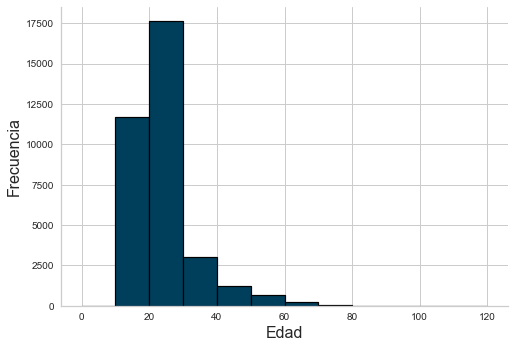

In [15]:
ax = plt.subplot(111)

ax.hist(dfGeneral['age'],bins = [0,10,20,30,40,50,60,70,80,110,120], color = "#003f5c",edgecolor='black', linewidth=1.2)
ax.set_ylabel("Frecuencia", fontsize = 16)
ax.set_xlabel("Edad", fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Rangos de edades

In [16]:
ar = dfGeneral['age'].unique()
ar.sort()
ar

array([ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  85,  89, 115, 117])

### Pasando edad a dato categórico

In [17]:
dfGeneral['age'] = dfGeneral['age'] // 10
dfGeneral

<ipython-input-17-45b9824bb407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGeneral['age'] = dfGeneral['age'] // 10


,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
0,2,3,2,2,1,1,12,1,1,2,1,2
2,2,3,2,2,1,1,4,3,6,1,1,3
3,1,3,2,1,1,2,4,5,7,2,1,5
4,3,2,2,2,1,3,10,1,1,2,1,4
5,2,3,2,2,2,1,4,1,7,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39769,1,2,2,1,1,1,1,1,7,2,1,3
39770,2,2,1,1,1,1,2,4,6,2,1,2
39772,3,2,2,1,4,1,7,1,3,1,2,3
39773,3,2,2,1,2,1,6,1,6,1,1,2


### Gráficas de información general de los usuarios

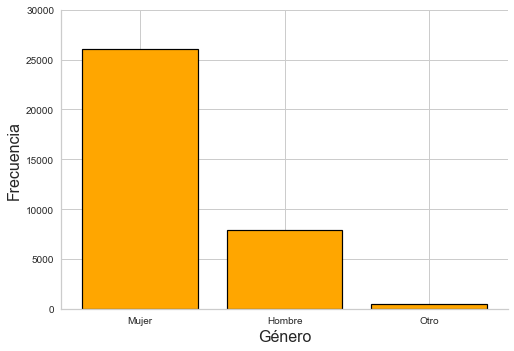

In [18]:
ax = plt.subplot(111)

ax.bar(["Mujer", "Hombre", "Otro"], [dfGeneral['gender'].value_counts()[i] for i in [2,1,3]], color = "#ffa600",edgecolor='black', linewidth=1.2)
ax.set_ylabel("Frecuencia", fontsize = 16)
ax.set_xlabel("Género", fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0, 30000])
plt.show()

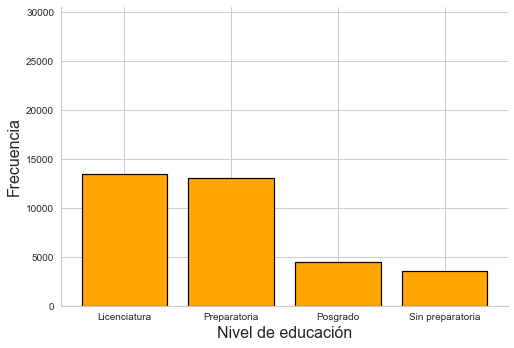

In [19]:
ax = plt.subplot(111)

ax.bar(["Licenciatura", "Preparatoria", "Posgrado", "Sin preparatoria"], [dfGeneral['education'].value_counts()[i] for i in [3,2,4,1]], color = "#ffa600",edgecolor='black', linewidth=1.2)
ax.set_ylabel("Frecuencia", fontsize = 16)
ax.set_xlabel("Nivel de educación", fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0, 30500])
plt.show()

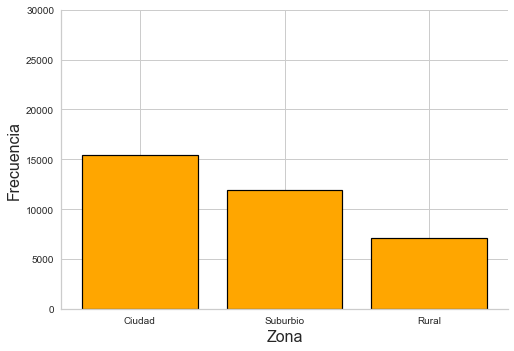

In [20]:
ax = plt.subplot(111)

ax.bar(["Ciudad", "Suburbio", "Rural"], [dfGeneral['urban'].value_counts()[i] for i in [3,2,1]], color = "#ffa600",edgecolor='black', linewidth=1.2)
ax.set_ylabel("Frecuencia", fontsize = 16)
ax.set_xlabel("Zona", fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0, 30000])
plt.show()

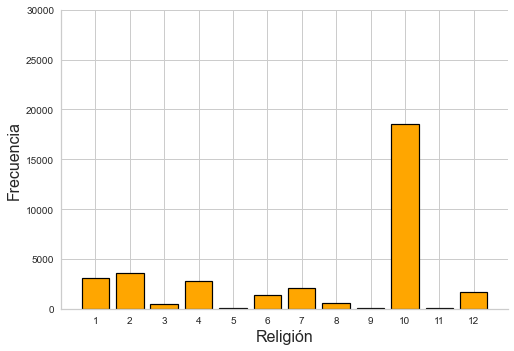

In [21]:
ax = plt.subplot(111)

ax.bar([str(i+1) for i in range(12)], [dfGeneral['religion'].value_counts()[i+1] for i in range(12)], color = "#ffa600",edgecolor='black', linewidth=1.2)
ax.set_ylabel("Frecuencia", fontsize = 16)
ax.set_xlabel("Religión", fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0, 30000])
plt.show()

### Clusters a partir de los datos

In [22]:
dfGeneralBin = dfBin(dfGeneral)
dfGeneralBin

,education_1,education_2,education_3,education_4,urban_1,urban_2,urban_3,gender_1,gender_2,gender_3,...,familysize_8,familysize_9,familysize_10,familysize_11,familysize_12,familysize_13,familysize_14,familysize_15,familysize_16,familysize_17
0,False,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
39770,False,True,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
39772,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
39773,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


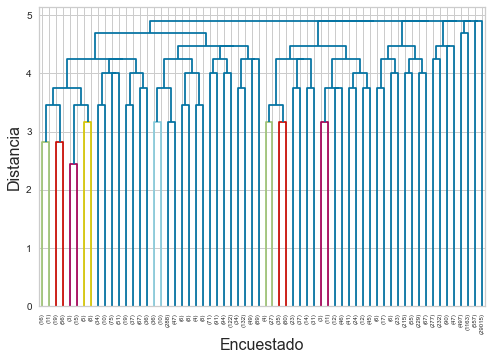

In [23]:
getDendrogram(dfGeneralBin)

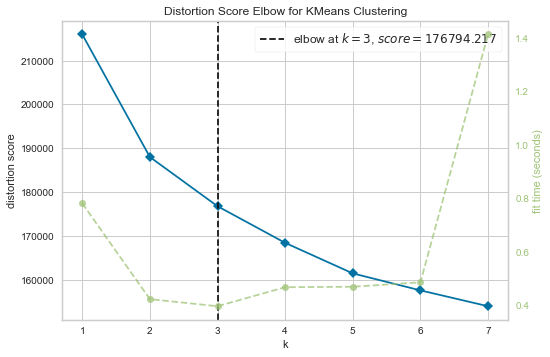

In [24]:
elbowMethod(dfGeneralBin)

In [25]:
GenCl, GenCentroids, GenClusDF = getClustersCentroidsDF(dfGeneralBin, n = 3)
GenClusDF.round(1).head(60)

,Group 0,Group 1,Group 2
education_1,0.1,0.0,0.2
education_2,0.8,0.0,0.4
education_3,0.1,0.7,0.2
education_4,0.0,0.2,0.1
urban_1,0.2,0.2,0.2
urban_2,0.3,0.3,0.4
urban_3,0.5,0.4,0.4
gender_1,0.2,0.2,0.3
gender_2,0.8,0.8,0.6
gender_3,0.0,0.0,0.0


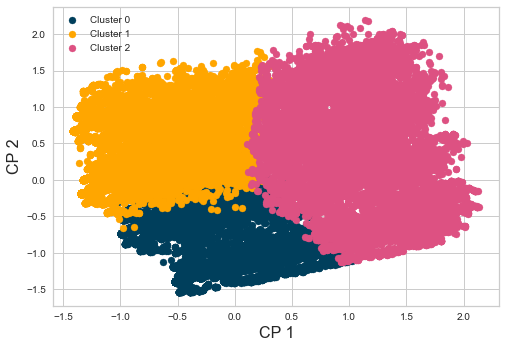

In [26]:
A = np.asarray(dfGeneralBin)
plotInPC12(A,GenCl)

In [27]:
GenCl, GenCentroids, GenClusDF = getClustersCentroidsDF(dfGeneralBin, n = 2)
GenClusDF.round(1).head(60)

,Group 0,Group 1
education_1,0.0,0.2
education_2,0.3,0.5
education_3,0.5,0.2
education_4,0.1,0.1
urban_1,0.2,0.2
urban_2,0.3,0.4
urban_3,0.5,0.4
gender_1,0.2,0.3
gender_2,0.8,0.6
gender_3,0.0,0.0


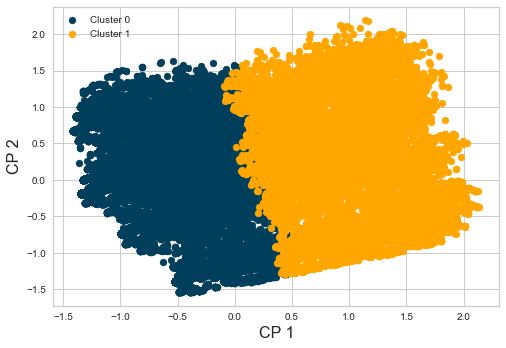

In [28]:
A = np.asarray(dfGeneralBin)
plotInPC12(A,GenCl)

# Perfiles de DASS


### Patrones frecuentes

In [29]:
fpGen = getFP(dfDASS, minS = 0.1)
fpGen

,support,itemsets
0,0.224110,(DepressionCat_0)
1,0.176476,(DepressionCat_2)
2,0.162443,(DepressionCat_3)
3,0.342311,(DepressionCat_4)
4,0.249565,(AnxietyCat_0)
5,0.178853,(AnxietyCat_2)
6,0.151745,(AnxietyCat_3)
7,0.350719,(AnxietyCat_4)
8,0.298040,(StressCat_0)
9,0.124348,(StressCat_1)


### Reglas de asociación

In [30]:
getAR(fpGen, minT = 0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(StressCat_4),(DepressionCat_4),0.144207,0.342311,0.120869,0.838158,2.448527,0.071505,4.063781
1,(StressCat_4),(AnxietyCat_4),0.144207,0.350719,0.128639,0.892039,2.543457,0.078062,6.014011
2,"(DepressionCat_0, AnxietyCat_0)",(StressCat_0),0.145483,0.298040,0.132350,0.909725,3.052357,0.088990,7.775794
3,"(StressCat_4, DepressionCat_4)",(AnxietyCat_4),0.120869,0.350719,0.111765,0.924682,2.636533,0.069374,8.620549
4,"(StressCat_4, AnxietyCat_4)",(DepressionCat_4),0.128639,0.342311,0.111765,0.868830,2.538129,0.067731,5.014029


### Clusters

In [31]:
dfDASSBin = dfBin(dfDASS)
dfDASSBin

,DepressionCat_0,DepressionCat_1,DepressionCat_2,DepressionCat_3,DepressionCat_4,AnxietyCat_0,AnxietyCat_1,AnxietyCat_2,AnxietyCat_3,AnxietyCat_4,StressCat_0,StressCat_1,StressCat_2,StressCat_3,StressCat_4
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
5,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
39770,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
39772,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
39773,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False


In [32]:
dfDASS

,DepressionCat,AnxietyCat,StressCat
0,3,4,4
2,4,2,1
3,2,3,1
4,4,4,3
5,1,0,0
...,...,...,...
39769,2,4,3
39770,4,2,1
39772,0,0,0
39773,2,2,3


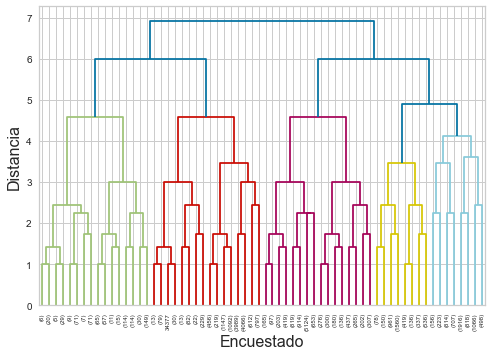

In [33]:
getDendrogram(dfDASS)

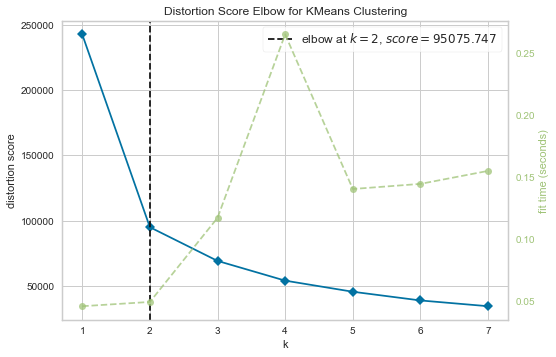

In [34]:
elbowMethod(dfDASS)

In [35]:
DASSCl, DASSCentroids, DASSClusDF = getClustersCentroidsDF(dfDASS, n = 2)
DASSClusDF

,Group 0,Group 1
DepressionCat,3.291261,0.901888
AnxietyCat,3.350245,0.771493
StressCat,2.730821,0.434627


In [36]:
DASSCl4, DASSCentroids4, DASSClusDF4 = getClustersCentroidsDF(dfDASS, n = 4)
DASSClusDF4

,Group 0,Group 1,Group 2,Group 3
DepressionCat,3.674405,0.387134,1.660455,3.253985
AnxietyCat,3.738092,0.410767,2.867429,1.068863
StressCat,3.184579,0.197541,1.570239,1.324973


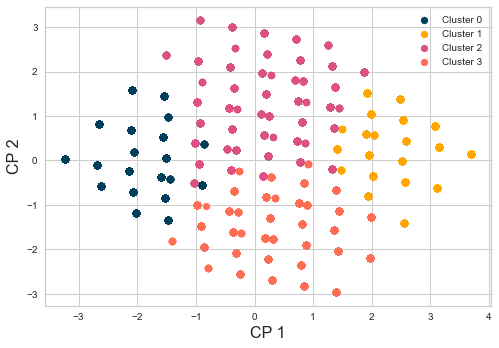

In [37]:
ADASS = np.asarray(dfDASS)
plotInPC12(ADASS,DASSCl4)

# Personalidades

In [38]:
personalities

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
0,0.5,4.5,4.5,0.5,6.5
2,1.5,3.5,2.0,4.0,5.0
3,2.0,6.0,6.5,4.5,6.0
4,2.0,3.5,2.0,2.0,4.5
5,1.0,6.5,5.5,6.0,3.5
...,...,...,...,...,...
39769,5.0,3.5,4.5,3.5,3.0
39770,2.0,5.0,3.5,2.5,3.5
39772,5.0,3.5,6.5,3.5,4.5
39773,1.5,2.0,3.5,1.5,3.0


In [39]:
def discretePersonality(score):
    if(float(score) < 3):
        return 1
    elif(float(score) < 5):
        return 2
    return 3


personalities.columns
for p in personalities.columns:
    personalities[p + "Cat"] = personalities[p].apply(discretePersonality)
#df['ageCat'] = df['age'].apply(discretePersonality)
personalities

<ipython-input-39-f13dbad0818e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personalities[p + "Cat"] = personalities[p].apply(discretePersonality)


,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness,ExtraversionCat,AgreeablenessCat,ConscientiousnessCat,EmotionalStabilityCat,OpennessCat
0,0.5,4.5,4.5,0.5,6.5,1,2,2,1,3
2,1.5,3.5,2.0,4.0,5.0,1,2,1,2,3
3,2.0,6.0,6.5,4.5,6.0,1,3,3,2,3
4,2.0,3.5,2.0,2.0,4.5,1,2,1,1,2
5,1.0,6.5,5.5,6.0,3.5,1,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...
39769,5.0,3.5,4.5,3.5,3.0,3,2,2,2,2
39770,2.0,5.0,3.5,2.5,3.5,1,3,2,1,2
39772,5.0,3.5,6.5,3.5,4.5,3,2,3,2,2
39773,1.5,2.0,3.5,1.5,3.0,1,1,2,1,2


In [40]:
personalitiesCat = pd.DataFrame()

for p in personalities.columns[-5:]:
    personalitiesCat[p] = personalities[p] 
    
personalitiesCat

,ExtraversionCat,AgreeablenessCat,ConscientiousnessCat,EmotionalStabilityCat,OpennessCat
0,1,2,2,1,3
2,1,2,1,2,3
3,1,3,3,2,3
4,1,2,1,1,2
5,1,3,3,3,2
...,...,...,...,...,...
39769,3,2,2,2,2
39770,1,3,2,1,2
39772,3,2,3,2,2
39773,1,1,2,1,2


### Patrones frecuentes

In [41]:
persFP = getFP(personalities, minS = 0.3)
persFP

,support,itemsets
0,0.460600,(ExtraversionCat_1)
1,0.394497,(ExtraversionCat_2)
2,0.596776,(AgreeablenessCat_2)
3,0.482605,(ConscientiousnessCat_2)
4,0.545054,(EmotionalStabilityCat_1)
5,0.337122,(EmotionalStabilityCat_2)
6,0.514003,(OpennessCat_2)
7,0.336716,(OpennessCat_3)
8,0.302302,"(ConscientiousnessCat_2, AgreeablenessCat_2)"
9,0.335237,"(EmotionalStabilityCat_1, AgreeablenessCat_2)"


### Reglas de asociación

In [42]:
getAR(persFP, minT = 0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ConscientiousnessCat_2),(AgreeablenessCat_2),0.482605,0.596776,0.302302,0.626397,1.049634,0.014295,1.079284
1,(EmotionalStabilityCat_1),(AgreeablenessCat_2),0.545054,0.596776,0.335237,0.615053,1.030626,0.009962,1.047480
2,(OpennessCat_2),(AgreeablenessCat_2),0.514003,0.596776,0.323611,0.629590,1.054985,0.016866,1.088588


### Clusters

In [43]:
personalities = personalities[["Extraversion","Agreeableness", "Conscientiousness","EmotionalStability","Openness"]]
personalities

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
0,0.5,4.5,4.5,0.5,6.5
2,1.5,3.5,2.0,4.0,5.0
3,2.0,6.0,6.5,4.5,6.0
4,2.0,3.5,2.0,2.0,4.5
5,1.0,6.5,5.5,6.0,3.5
...,...,...,...,...,...
39769,5.0,3.5,4.5,3.5,3.0
39770,2.0,5.0,3.5,2.5,3.5
39772,5.0,3.5,6.5,3.5,4.5
39773,1.5,2.0,3.5,1.5,3.0


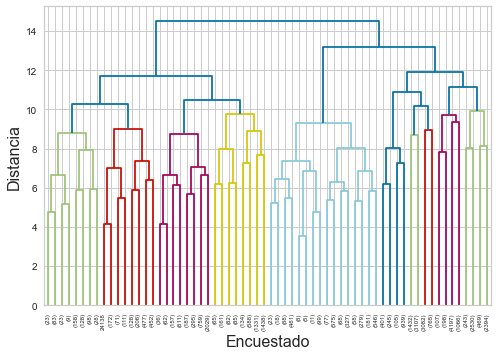

In [44]:
getDendrogram(personalities)

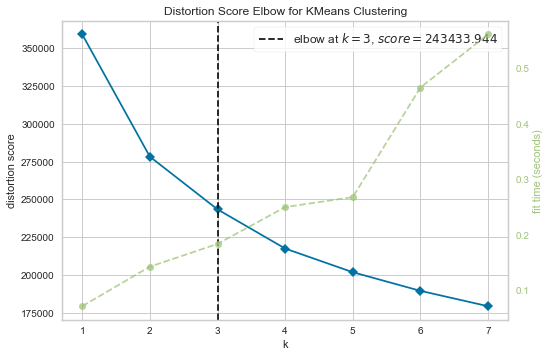

In [45]:
elbowMethod(personalities)

In [46]:
PersCl, PersCentroids, PersClusDF = getClustersCentroidsDF(personalities, n = 3)
PersClusDF

,Group 0,Group 1,Group 2
Extraversion,4.268702,3.267441,1.650431
Agreeableness,3.694169,4.571080,3.910011
Conscientiousness,3.513889,4.796907,3.100075
EmotionalStability,2.190136,4.395453,1.907649
Openness,4.371333,4.743487,3.451444


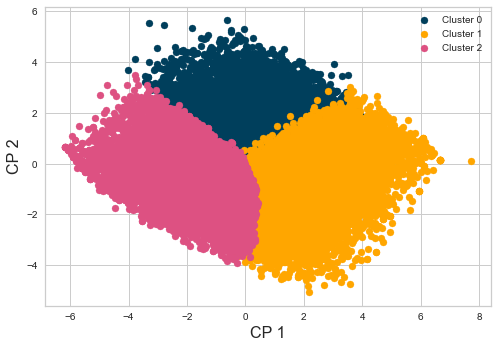

In [47]:
APers = np.asarray(personalities)
plotInPC12(APers,PersCl)

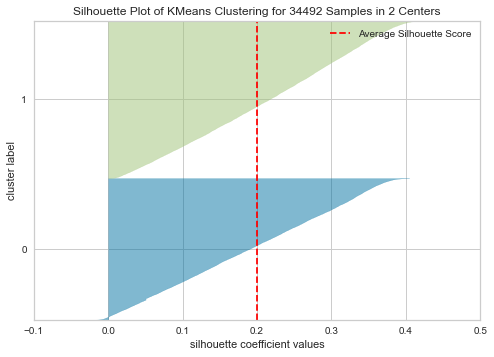

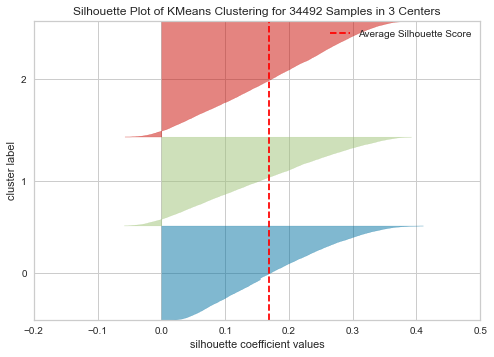

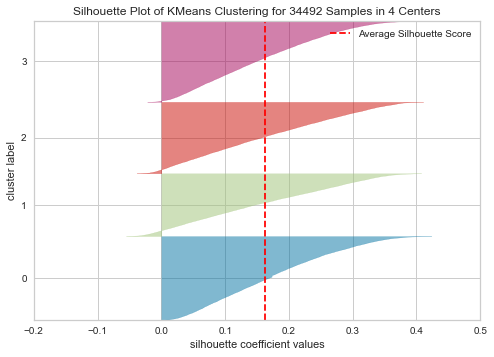

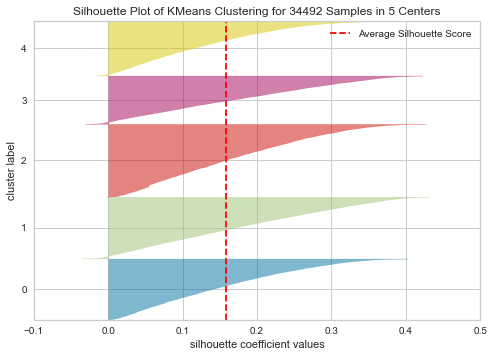

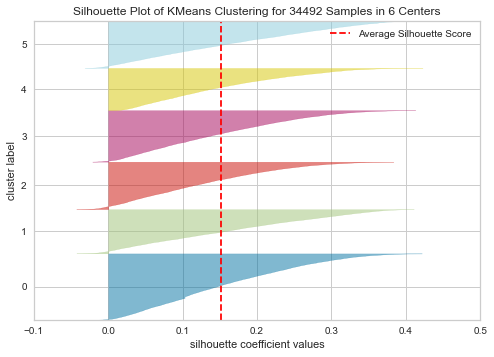

In [48]:
getSilhouettePlots(personalities)

# Relación entre los perfiles

### Normalized Mutual Information entre todas las parejas de conjuntos

In [49]:
normalized_mutual_info_score(GenCl,DASSCl4)

0.00847790405322428

In [50]:
normalized_mutual_info_score(GenCl,PersCl)

0.004940920950086298

In [51]:
normalized_mutual_info_score(PersCl,DASSCl4)

0.09976702023015725

### Checando si grupos se relacionan con otros grupos por medio de patrones frecuentes y reglas de asociación

In [52]:
profileClusters = pd.DataFrame({"General": GenCl, "DASS": DASSCl4, "Personality": PersCl})
profileClusters

,General,DASS,Personality
0,0,0,2
1,1,3,2
2,1,2,1
3,0,0,2
4,0,1,1
...,...,...,...
34487,1,0,0
34488,1,3,2
34489,1,1,1
34490,1,2,2


In [53]:
fpClus = getFP(profileClusters, minS = 0.15)
fpClus

,support,itemsets
0,0.621854,(General_0)
1,0.378146,(General_1)
2,0.384669,(DASS_0)
3,0.273571,(DASS_1)
4,0.205352,(DASS_2)
5,0.315435,(Personality_0)
6,0.297402,(Personality_1)
7,0.387162,(Personality_2)
8,0.238577,"(DASS_0, General_0)"
9,0.180042,"(DASS_1, General_0)"


In [54]:
getAR(fpClus,minT = 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DASS_0),(General_0),0.384669,0.621854,0.238577,0.620214,0.997362,-0.000631,0.995681
1,(DASS_1),(General_0),0.273571,0.621854,0.180042,0.658118,1.058315,0.009921,1.106070
2,(Personality_0),(General_0),0.315435,0.621854,0.212716,0.674357,1.084429,0.016561,1.161226
3,(Personality_1),(General_0),0.297402,0.621854,0.189116,0.635894,1.022577,0.004175,1.038559
4,(Personality_2),(General_0),0.387162,0.621854,0.220022,0.568294,0.913870,-0.020736,0.875934
5,(DASS_0),(Personality_2),0.384669,0.387162,0.217123,0.564441,1.457892,0.068194,1.407014
6,(Personality_2),(DASS_0),0.387162,0.384669,0.217123,0.560806,1.457892,0.068194,1.401045
7,(DASS_1),(Personality_1),0.273571,0.297402,0.169894,0.621026,2.088168,0.088534,1.853946
8,(Personality_1),(DASS_1),0.297402,0.273571,0.169894,0.571261,2.088168,0.088534,1.694341


In [55]:
profileClustersBin = dfBin(profileClusters)
profileClustersBin

,General_0,General_1,DASS_0,DASS_1,DASS_2,DASS_3,Personality_0,Personality_1,Personality_2
0,True,False,True,False,False,False,False,False,True
1,False,True,False,False,False,True,False,False,True
2,False,True,False,False,True,False,False,True,False
3,True,False,True,False,False,False,False,False,True
4,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
34487,False,True,True,False,False,False,True,False,False
34488,False,True,False,False,False,True,False,False,True
34489,False,True,False,True,False,False,False,True,False
34490,False,True,False,False,True,False,False,False,True


### Haciendo clustering

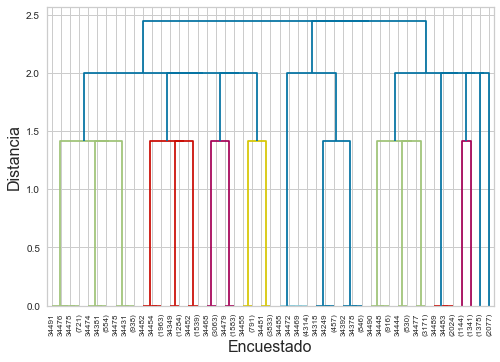

In [56]:
getDendrogram(profileClustersBin)

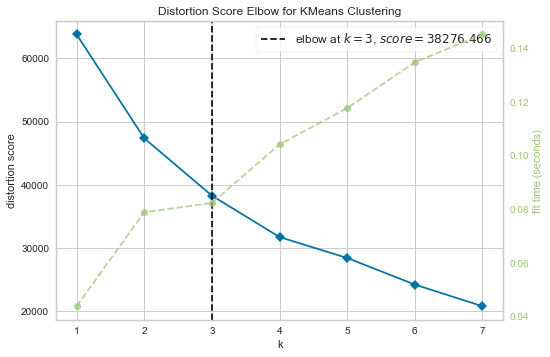

In [57]:
elbowMethod(profileClustersBin)

In [58]:
ProfClus, ProfCen, ProfClusDF = getClustersCentroidsDF(profileClustersBin, n = 3)
ProfClusDF.round(2)

,Group 0,Group 1,Group 2
General_0,0.57,0.64,0.67
General_1,0.43,0.36,0.33
DASS_0,0.56,0.13,0.41
DASS_1,0.10,0.57,0.21
DASS_2,0.18,0.18,0.26
DASS_3,0.16,0.12,0.13
Personality_0,-0.00,-0.00,1.00
Personality_1,0.00,1.00,0.00
Personality_2,1.00,-0.00,-0.00


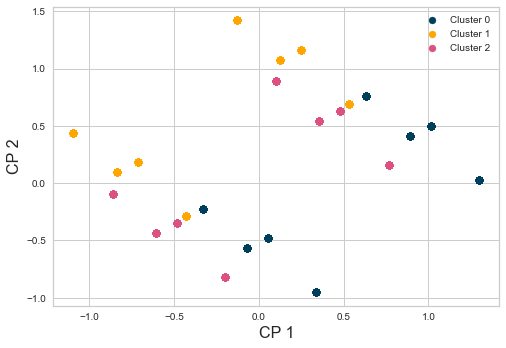

In [59]:
AProf = np.asarray(profileClustersBin)*1
plotInPC12(AProf,ProfClus)

In [60]:
personalities

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
0,0.5,4.5,4.5,0.5,6.5
2,1.5,3.5,2.0,4.0,5.0
3,2.0,6.0,6.5,4.5,6.0
4,2.0,3.5,2.0,2.0,4.5
5,1.0,6.5,5.5,6.0,3.5
...,...,...,...,...,...
39769,5.0,3.5,4.5,3.5,3.0
39770,2.0,5.0,3.5,2.5,3.5
39772,5.0,3.5,6.5,3.5,4.5
39773,1.5,2.0,3.5,1.5,3.0


# Relacionando preguntas

In [65]:
dfAnswers

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
5,1,1,2,1,3,1,1,3,3,2,...,4,1,3,2,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,3,4,2,2,2,4,4,2,1,3,...,3,4,2,1,2,1,4,4,2,1
39770,2,1,3,2,3,2,1,3,1,4,...,2,4,1,2,4,4,2,3,1,3
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,1,1,1,2,1,1,1
39773,3,1,2,2,3,3,3,4,3,1,...,4,2,3,2,1,2,3,2,4,3


### Encontrando $k$

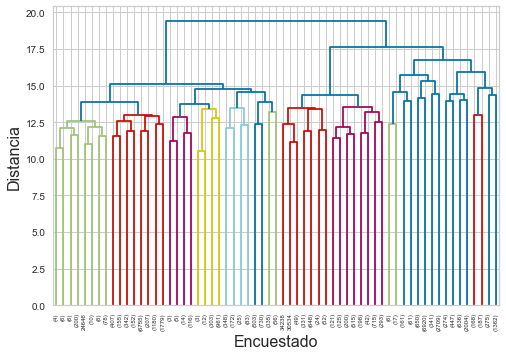

In [66]:
getDendrogram(dfAnswers)

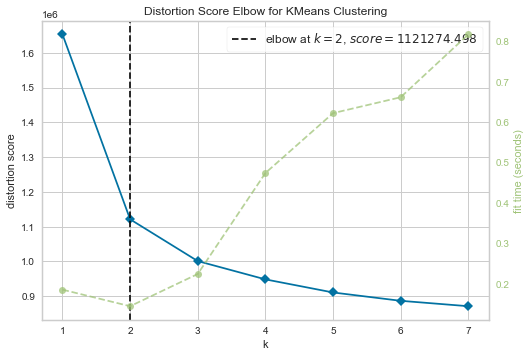

In [67]:
elbowMethod(dfAnswers)

### Patrones frecuentes y reglas de asociación

In [68]:
ansFP = getFP(dfAnswers, minS = 0.25)

In [69]:
ansFP.sort_values(by="support", ascending = True)

,support,itemsets
87,0.250290,"(Q25A_1, Q15A_1)"
1,0.250783,(Q1A_3)
20,0.250870,(Q11A_3)
112,0.251624,"(Q41A_1, Q19A_1, Q7A_1)"
72,0.252928,(Q42A_3)
...,...,...
7,0.449061,(Q4A_1)
11,0.457584,(Q7A_1)
33,0.469848,(Q19A_1)
27,0.495100,(Q15A_1)


In [70]:
getAR(ansFP,minT = 0.7).sort_values(by="confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,"(Q4A_1, Q7A_1)",(Q23A_1),0.319059,0.636263,0.286327,0.897410,1.410438,0.083321,3.545545
39,"(Q41A_1, Q4A_1)",(Q23A_1),0.304592,0.636263,0.272614,0.895012,1.406669,0.078813,3.464566
34,"(Q4A_1, Q15A_1)",(Q23A_1),0.326974,0.636263,0.292010,0.893066,1.403611,0.083968,3.401509
37,"(Q19A_1, Q4A_1)",(Q23A_1),0.299229,0.636263,0.266410,0.890321,1.399296,0.076021,3.316364
42,"(Q7A_1, Q15A_1)",(Q23A_1),0.333759,0.636263,0.295315,0.884816,1.390644,0.082956,3.157869
...,...,...,...,...,...,...,...,...,...
50,"(Q7A_1, Q23A_1)",(Q19A_1),0.385510,0.469848,0.274006,0.710762,1.512748,0.092875,1.832925
1,(Q4A_1),(Q7A_1),0.449061,0.457584,0.319059,0.710504,1.552728,0.113576,1.873656
11,(Q41A_1),(Q15A_1),0.439000,0.495100,0.310507,0.707304,1.428608,0.093158,1.724998
38,"(Q19A_1, Q23A_1)",(Q4A_1),0.377595,0.449061,0.266410,0.705544,1.571154,0.096847,1.871039


### Clustering

In [71]:
ansClus, ansCen, ansClusDF = getClustersCentroidsDF(dfAnswers, n = 2)
ansClusDF

,Group 0,Group 1
Q1A,3.235774,2.005350
Q2A,2.587130,1.749616
Q3A,2.872245,1.596448
Q4A,2.470011,1.439638
Q5A,3.189624,1.893164
Q6A,3.103055,1.992373
Q7A,2.435797,1.419603
Q8A,3.106660,1.882463
Q9A,3.255747,2.092549
Q10A,3.181646,1.739200


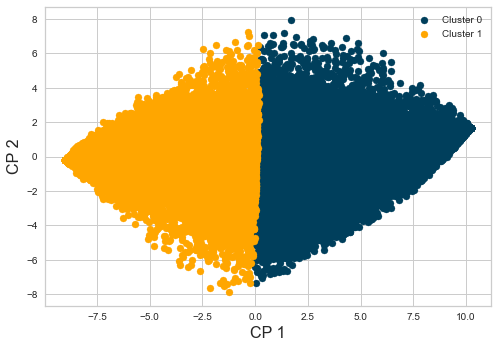

In [72]:
Aans = np.asarray(dfAnswers)
plotInPC12(Aans,ansClus)

### Comparación perfiles a partir de respuestas contra perfiles a partir de DASS ($k = 2$)

In [73]:
normalized_mutual_info_score(DASSCl,ansClus)

0.5901684875540099

### Comparación perfiles a partir de respuestas contra perfiles a partir de DASS ($k = 4$)

In [74]:
ansClus4, ansCen4, ansClusDF4 = getClustersCentroidsDF(dfAnswers, n = 4)
ansClusDF4

,Group 0,Group 1,Group 2,Group 3
Q1A,2.798568,3.548403,1.681475,2.598160
Q2A,2.054985,2.969037,1.558529,2.160714
Q3A,2.769927,3.175254,1.347350,1.857792
Q4A,1.740611,2.982621,1.248786,1.921104
Q5A,3.065523,3.455636,1.586011,2.268506
Q6A,2.592137,3.434096,1.692117,2.585714
Q7A,1.699000,2.957778,1.226263,1.899242
Q8A,2.617671,3.471056,1.567621,2.460606
Q9A,2.687787,3.589402,1.735200,2.796753
Q10A,3.266955,3.430302,1.439302,1.975866


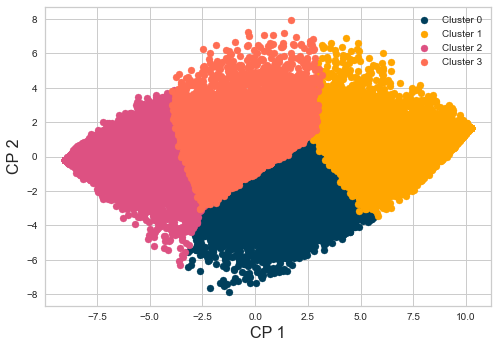

In [75]:
Aans = np.asarray(dfAnswers)
plotInPC12(Aans,ansClus4)

In [93]:
normalized_mutual_info_score(DASSCl4,ansClus4)

0.5674839726396292

### Comparando perfiles generados a partir de puntaje completo de DASS con clustering a partir de preguntas

In [76]:
dfDASSPoints = df[['DepressionPoints','AnxietyPoints','StressPoints']]
dfDASSPoints

,DepressionPoints,AnxietyPoints,StressPoints
0,27,34,40
2,39,12,17
3,16,17,16
4,32,40,29
5,13,6,12
...,...,...,...
39769,15,21,30
39770,36,12,15
39772,4,1,5
39773,16,13,33


In [77]:
DASSPointsClus, DassPointsCen, DassPointsClusDF = getClustersCentroidsDF(dfDASSPoints, n = 2)
DassPointsClusDF

,Group 0,Group 1
DepressionPoints,30.999582,11.668021
AnxietyPoints,23.570892,8.717606
StressPoints,29.349299,13.315733


In [78]:
normalized_mutual_info_score(ansClus,DASSPointsClus)

0.9305163541144879